In [0]:
#OLD FAITHFUL GYSER DATA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('faithful.csv')
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [3]:
data=df.values
# print(data)
print(data.shape)

(272, 3)


In [0]:
# print(data[:,1:3])

In [4]:
data=data[:,1:3]
# print(data)
print(data.shape)

(272, 2)


Text(0.5, 1.0, 'Visualization of raw data')

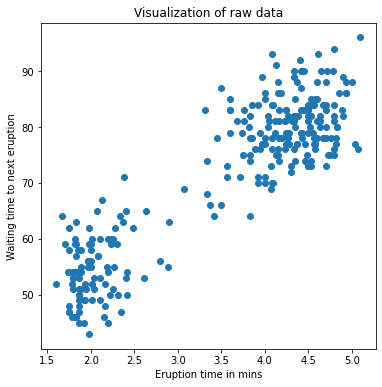

In [5]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')


In [6]:
#Import Libraries

from sklearn.datasets.samples_generator import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
#Normalising the data
Data_X=StandardScaler(with_mean=True,with_std=True).fit_transform(data)
Data_X.shape

(272, 2)

In [0]:
#Creating clusters

km=KMeans(n_clusters=2,max_iter=100)
km.fit(Data_X)
centroids=km.cluster_centers_

In [9]:
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

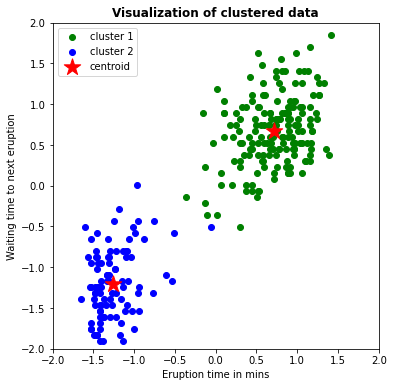

In [10]:
#plotting clustered data along with centroids

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(Data_X[km.labels_ == 0, 0], Data_X[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(Data_X[km.labels_ == 1, 0], Data_X[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

In [0]:
import random as rd

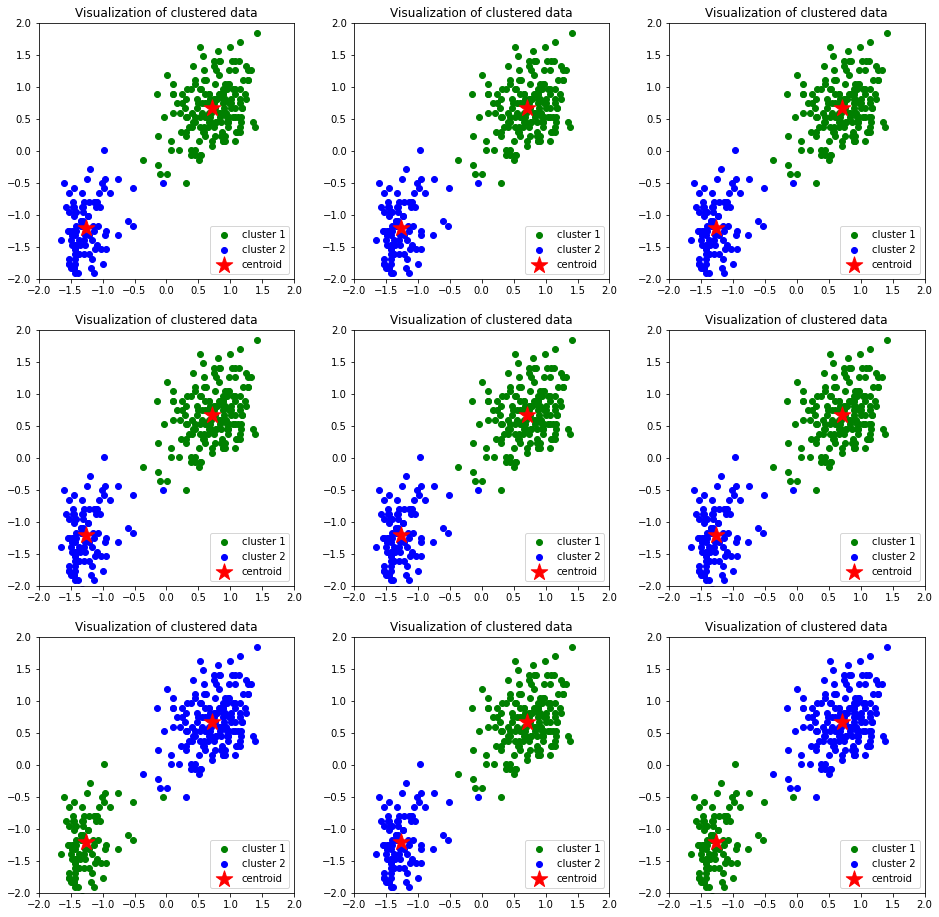

In [13]:
#plotting using random initialisation

iterations=9
sse=[]
fig, ax = plt.subplots(3,3,figsize=(16, 16))
ax=np.ravel(ax)

for i in range (iterations):

  dist=0
  km=KMeans(n_clusters=2,max_iter=3,random_state=rd.randint(1,5000))
  km.fit(Data_X)
  centroids=km.cluster_centers_
  sse.append(km.inertia_)

  ax[i].scatter(Data_X[km.labels_ == 0, 0], Data_X[km.labels_ == 0, 1],
            c='green', label='cluster 1')
  ax[i].scatter(Data_X[km.labels_ == 1, 0], Data_X[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
  ax[i].set_xlim([-2, 2])
  ax[i].set_ylim([-2, 2])
  ax[i].legend(loc='lower right')
  ax[i].set_title('Visualization of clustered data')
  ax[i].set_aspect('equal')


In [15]:
#The squared sum error
sse

[79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701,
 79.57595948827701]